In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.cluster import MiniBatchKMeans

import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.gridspec as gridspec

Load timeseries matrix

In [22]:
ls ../data/

labmt.dat           top1000_@.dat     top1000_#.txt     top2000_#.txt
labmt.txt           top1000_#.dat     top_2000.dat      top3000_no@#.txt
original_labmt.txt  top1000_no@#.txt  top2000_no@#.txt  top_3000.txt
top_10000.txt       top_1000.txt      top_2000.txt      top3000_@.txt
top_1000.dat        top1000_@.txt     top2000_@.txt     top3000_#.txt


In [23]:
filename = 'top1000_no@#'

x1 = np.loadtxt(f'../data/{filename}.dat')
with open(f'../data/{filename}.txt','r') as f:
    names = [i.strip() for i in f.readlines()]
print(names)
"""
x1 = np.loadtxt('../data/labmt.dat')
with open('labmt_words.txt','r') as f:
    names = [i.strip() for i in f.readlines()]
print(names)"""

['140727', 'แค', '조심히', '結果はこちら', 'each', 'coding', '完全流出動画', '180930', 'cess', 'myxitup', 'ayuda', 'crown', 'کے', '//4sq', '토토', 'rake', 'newton', 'envoyer', 'kamu', '번째', '머스터', 'colegio', '아미', 'sitesi', "o'reilly", 'gezi', 'anything', 'co/4kghkzdqzh', 'sprouse', '180529', 'emotionally', 'homage', 'influenza', 'chinese', 'お得なコンビ', "nite's", 'years', 'ni', 'japon', 'eurovision', 'بشكل', 'oned', 'mv', 'qué', 'marcha', '받아요', 'sager', 'forum', '投票可能', 'ณล', 'carolina', 'ciudad', '160928', 'vids', '명품카지노', 'lista', 'caravan', 'bbr', 'hologram', 'عندك', 'msnbc', 'corinthiana', 'برحمتك', 'なんとオーブ50個ゲット', 'kapamilya', '配布されるアイテムは毎日変わるよ', '151125', 'summertime', 'shopgirl', 'rate', 'kizlarla', '8-bit', 'bonuses', 'ういーっす', 'walang', 'hussle', 'マジうまっ', 'purposejustinbieber', '160322', 'chorão', 'bataclan', 'strong', 'ly/yqlpa', 'ะ', '今回はハズレです', 'innovate', 'domingo', 'adium', 'lovatos', 'incamiguinwithlove', 'server', 'นเท', 'yaaa', 'ﾟдﾟ', 'ᕗ', 'mt', 'bacana', 'hank', 'ல', '그래미', 'fucked', '女子

"\nx1 = np.loadtxt('../data/labmt.dat')\nwith open('labmt_words.txt','r') as f:\n    names = [i.strip() for i in f.readlines()]\nprint(names)"

Fit PCA

In [24]:
x1 = np.log(x1+10**(-9))

In [25]:
def plot_eigenfunctions(dates, eigen, axs):
    axs.plot(dates,eigen,lw=0.3, alpha=0.8)

In [26]:
pca = PCA()
obs_trans_ = pca.fit_transform(x1)

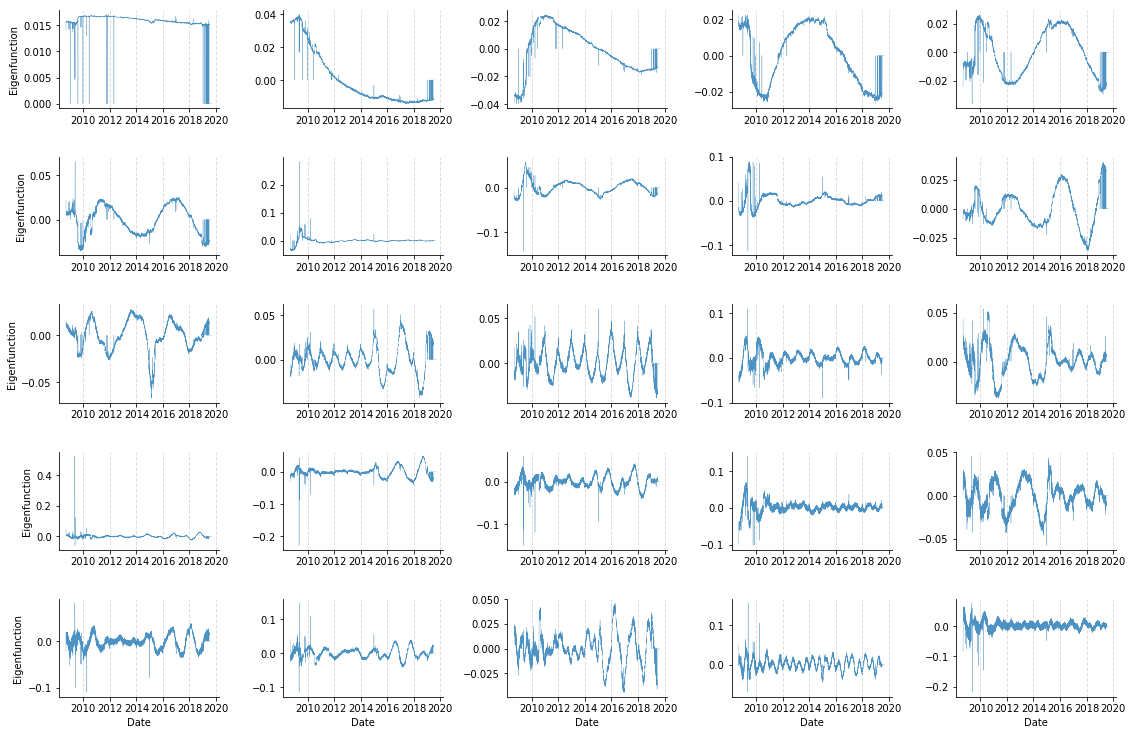

In [27]:
plt.figure(figsize=(36/1.9,24/1.9))
n = 5
dates = pd.date_range(start=datetime.datetime(2008,9,9),end=datetime.datetime.today(),freq='D')


gs0s = ['gs'+str(i)+str(j) for i in range(n) for j in range(n)]

gs0 = gridspec.GridSpec(n, n)

miny,maxy = 1,1
for i in range(n*n):
    gs0s[i] = plt.subplot(gs0[i])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)
    plot_eigenfunctions(dates,pca.components_[i],gs0s[i])

for i, axs in enumerate(gs0s):
    #axs.set_yticklabels([i for i in axs.get_yticklabels()])
    if i >= n*n-n:
        axs.set_xlabel('Date')
    if i%n ==0:
        axs.set_ylabel("Eigenfunction")
        
    axs.grid(which='major', axis='x',lw=1,linestyle='--',alpha=0.4)
    axs.spines['right'].set_visible(False)

    axs.spines['top'].set_visible(False)
plt.savefig("../figures/{filename}.pdf")
plt.savefig("../figures/{filename}.png", transparent=True)


plt.show()

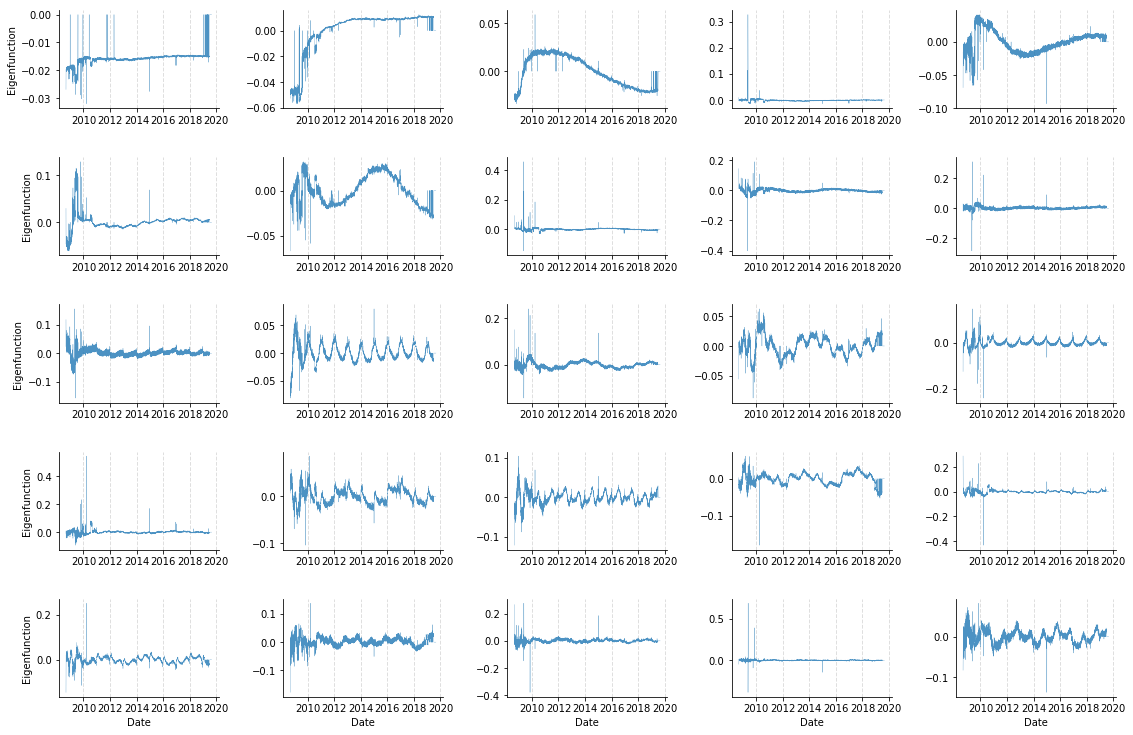

In [179]:
plt.figure(figsize=(36/1.9,24/1.9))
n = 5
dates = pd.date_range(start=datetime.datetime(2008,9,9),end=datetime.date.today(),freq='D')


gs0s = ['gs'+str(i)+str(j) for i in range(n) for j in range(n)]

gs0 = gridspec.GridSpec(n, n)

miny,maxy = 1,1
for i in range(n*n):
    gs0s[i] = plt.subplot(gs0[i])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)
    plot_eigenfunctions(dates,pca.components_[i],gs0s[i])

for i, axs in enumerate(gs0s):
    #axs.set_yticklabels([i for i in axs.get_yticklabels()])
    if i >= n*n-n:
        axs.set_xlabel('Date')
    if i%n ==0:
        axs.set_ylabel("Eigenfunction")
        
    axs.grid(which='major', axis='x',lw=1,linestyle='--',alpha=0.4)
    axs.spines['right'].set_visible(False)

    axs.spines['top'].set_visible(False)

plt.show()

In [90]:
pca2 = PCA()
obs_trans_2 = pca2.fit_transform(x1[x2])

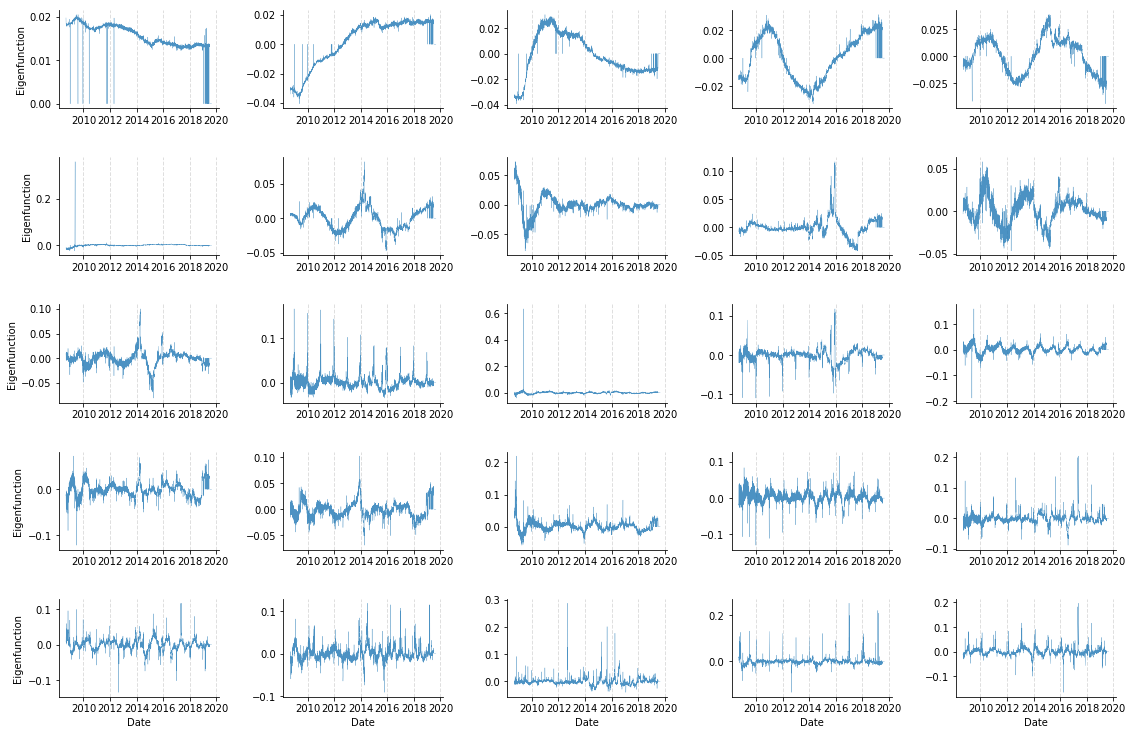

In [92]:
plt.figure(figsize=(36/1.9,24/1.9))
n = 5
dates = pd.date_range(start=datetime.datetime(2008,9,9),end=datetime.date.today(),freq='D')


gs0s = ['gs'+str(i)+str(j) for i in range(n) for j in range(n)]

gs0 = gridspec.GridSpec(n, n)

miny,maxy = 1,1
for i in range(n*n):
    gs0s[i] = plt.subplot(gs0[i])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)
    plot_eigenfunctions(dates,pca2.components_[i],gs0s[i])

for i, axs in enumerate(gs0s):
    #axs.set_yticklabels([i for i in axs.get_yticklabels()])
    if i >= n*n-n:
        axs.set_xlabel('Date')
    if i%n ==0:
        axs.set_ylabel("Eigenfunction")
        
    axs.grid(which='major', axis='x',lw=1,linestyle='--',alpha=0.4)
    axs.spines['right'].set_visible(False)

    axs.spines['top'].set_visible(False)

plt.show()

(32917, 4007)
[ True  True  True ...  True  True  True]


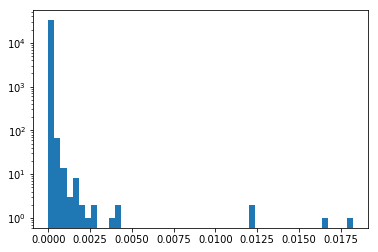

In [62]:
print(x1.shape)
x2 = np.std(x1, axis=1) <= 0.0001
plt.hist(np.std(x1, axis=1),log=True,bins=50)
print(x2)

In [134]:
pca2.explained_variance_ratio_

(4007,)

In [157]:
'christmas' in names2

False

In [28]:
transform = pca.transform(x1)

In [29]:
names = np.array(names)


In [30]:
for i in range(100):
    print(i, names[np.argmax(transform,axis=0)[i]])

0 rt
1 //twurl
2 hahart
3 tribez
4 すぐ返しますのでよろしくお願いします
5 أذكار_الصباح_و_المساء
6 //pic
7 //pic
8 //tumblr
9 잗
10 ➋رتويت
11 vday
12 1/27
13 v-day


KeyboardInterrupt: 

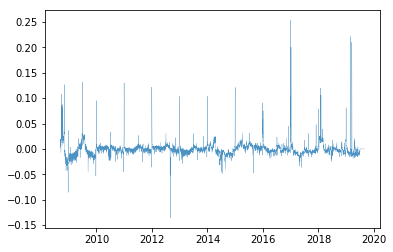

In [172]:
f,ax = plt.subplots()
plot_eigenfunctions(dates,pca2.components_[23],ax)

In [2]:
N = 1000
kind1 = 30
kind2 = 40
time = np.linspace(0, N, N)

tau = np.linspace(0, 10, 50)
b = 5
irf = np.exp(-tau / b)
noise1 = np.random.randn(kind1, N)
x1 = np.apply_along_axis(lambda x: np.convolve(x, irf, mode='same'),
                        axis=-1,
                        arr=noise1)

noise1 = 0.05 + np.random.randn(kind2, N)
x2 = np.cumsum(noise1, axis=-1)

Text(0.5, 1.0, 'very different time series!')

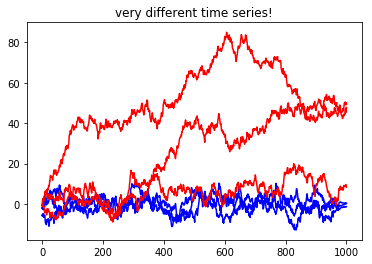

In [3]:
for x in x1[:3, :]:
    plt.plot(time, x, color='b')
    
for x in x2[:3, :]:
    plt.plot(time, x, color='r')
    
plt.title('very different time series!')

Now, let us suppose we are interested in sub-series of length $k$. Here we will take $k = 252$ because everything is actually about the stock market. 
Let us make some matrices of the correct dimensions. 

In [4]:
def make_matrix_from_ts(x, ell):
    """
    Makes a matrix (2d tensor) from a time series (1d tensor)
    
    Output will be of shape (len(x) -ell, ell)
    """
    matrix = np.array( [x[i : i + ell] for i in range(len(x) - ell)] )
    return matrix

Each point in time (each one out of the 252) is considered a feature, and each sub-series is now an observation.

In [5]:
ell = 252
obs = []

for x in x1:
    a = make_matrix_from_ts(x, ell)
    obs.append(a)
    
for x in x2:
    a = make_matrix_from_ts(x, ell)
    obs.append(a)
    
obs = np.vstack(obs)
print(obs.shape)

(52360, 252)


Now, just to project down to 2 components (for example) this is pretty easy. Here is how it is done using incremental PCA.

In [6]:
pca2 = PCA()
obs_trans_2 = pca2.fit_transform(obs)

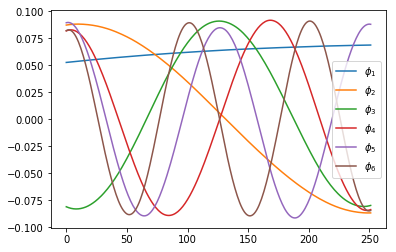

In [7]:
for i, x in enumerate(pca2.components_[:6]):  # pca2.components_ are the eigenfunctions
    label = '$\phi_{}$'
    label = label.format(i + 1)
    plt.plot(x,
            label=label)
    
plt.legend(ncol=1)

Above you can see the first six eigenfunctions. You see how they are pretty different from sines and cosines but could be mistaken for them. Now let us look at the distribution of parameters. We will figure out what they are for the first, say, 16  eigenfunctions.

In [195]:
model = LinearRegression()
model.fit(x1.T, pca.components_[:16].T)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

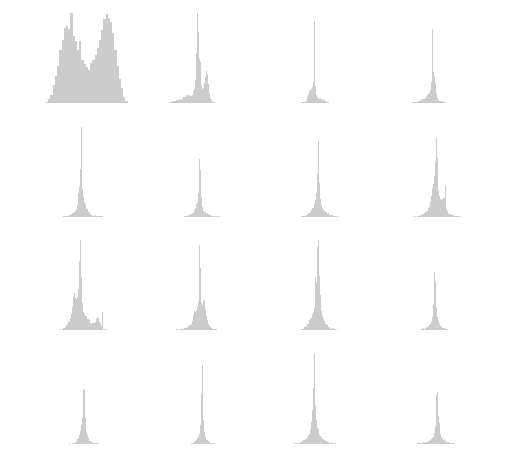

In [196]:
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
axes = axes.flatten()

for ax, row in zip(axes, model.coef_):
    ax.hist(row, bins='auto', color='k', alpha=0.2)
    ax.axis('off')

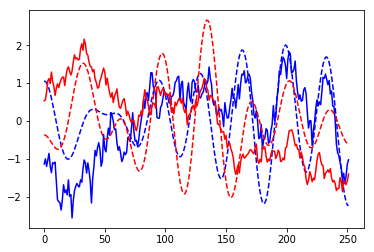

In [10]:
obs0_approx = np.dot(model.coef_[:, 0], pca2.components_[:16])
obs0_approx = (obs0_approx - obs0_approx.mean()) / obs0_approx.std()

plt.plot( (obs[0] - obs[0].mean()) / obs[0].std(),
        'b-')
plt.plot(obs0_approx, 'b--')

obsm1_approx = np.dot(model.coef_[:, -1], pca2.components_[:16])
obsm1_approx = (obsm1_approx - obsm1_approx.mean()) / obsm1_approx.std()

plt.plot( (obs[-1] - obs[-1].mean()) / obs[-1].std(),
        'r-')
plt.plot(obsm1_approx, 'r--')

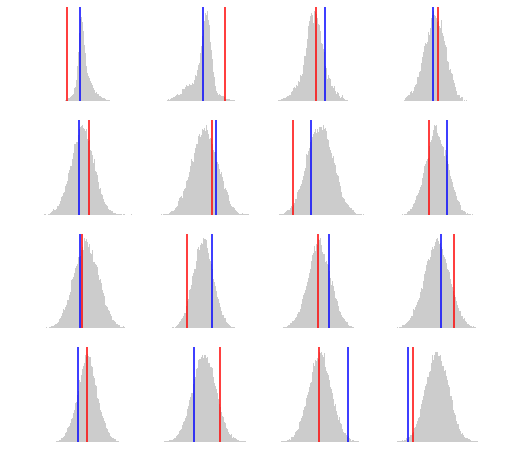

In [11]:
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
axes = axes.flatten()

for ax, row in zip(axes, model.coef_):
    ax.hist(row, bins='auto', color='k', alpha=0.2)
    ax.axvline(row[0], 0, 1, color='b')
    ax.axvline(row[-1], 0, 1, color='r')
    ax.axis('off')